In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import norm
from sklearn.preprocessing import LabelEncoder
from scipy.stats import boxcox

##### Step 1 - Data loading and Preprocessing

In [11]:
df = pd.read_csv('diabetes_prediction_dataset.csv')

In [12]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.width', 500)

In [13]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


In [15]:
df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
smoking_history        0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [16]:
df_columns = df.columns.values
df_columns

array(['gender', 'age', 'hypertension', 'heart_disease',
       'smoking_history', 'bmi', 'HbA1c_level', 'blood_glucose_level',
       'diabetes'], dtype=object)

In [17]:
for column in df.select_dtypes(include=['object']).columns:
    print(column)
    print(df[column].unique())
    print('-'*50)

gender
['Female' 'Male' 'Other']
--------------------------------------------------
smoking_history
['never' 'No Info' 'current' 'former' 'ever' 'not current']
--------------------------------------------------


In [18]:
df_duplicate = df[df.duplicated()]
df_duplicate

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
2756,Male,80.00,0,0,No Info,27.32,6.6,159,0
3272,Female,80.00,0,0,No Info,27.32,3.5,80,0
3418,Female,19.00,0,0,No Info,27.32,6.5,100,0
3939,Female,78.00,1,0,former,27.32,3.5,130,0
3960,Male,47.00,0,0,No Info,27.32,6.0,200,0
4106,Female,51.00,0,0,No Info,27.32,6.6,200,0
4128,Female,80.00,0,0,never,27.32,5.7,85,0
4224,Male,80.00,1,0,former,27.32,6.2,130,0
4263,Male,80.00,0,0,No Info,27.32,6.0,100,0
4486,Male,50.00,0,0,No Info,27.32,4.8,155,0


In [19]:
df.drop_duplicates(keep='first',inplace=True)

In [20]:
df.duplicated().sum()

np.int64(0)

In [21]:
df.describe()

,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000,96146.000000
mean,41.794326,0.077601,0.040803,27.321461,5.532609,138.218231,0.088220
std,22.462948,0.267544,0.197833,6.767716,1.073232,40.909771,0.283616
min,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,24.000000,0.000000,0.000000,23.400000,4.800000,100.000000,0.000000
50%,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,59.000000,0.000000,0.000000,29.860000,6.200000,159.000000,0.000000
max,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


In [22]:
df.describe(include='all')

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
count,96146,96146.000000,96146.000000,96146.000000,96146,96146.000000,96146.000000,96146.000000,96146.000000
unique,3,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN
top,Female,NaN,NaN,NaN,never,NaN,NaN,NaN,NaN
freq,56161,NaN,NaN,NaN,34398,NaN,NaN,NaN,NaN
mean,NaN,41.794326,0.077601,0.040803,NaN,27.321461,5.532609,138.218231,0.088220
std,NaN,22.462948,0.267544,0.197833,NaN,6.767716,1.073232,40.909771,0.283616
min,NaN,0.080000,0.000000,0.000000,NaN,10.010000,3.500000,80.000000,0.000000
25%,NaN,24.000000,0.000000,0.000000,NaN,23.400000,4.800000,100.000000,0.000000
50%,NaN,43.000000,0.000000,0.000000,NaN,27.320000,5.800000,140.000000,0.000000
75%,NaN,59.000000,0.000000,0.000000,NaN,29.860000,6.200000,159.000000,0.000000


##### Step 2 -- Exploratory Data Analysis (EDA)

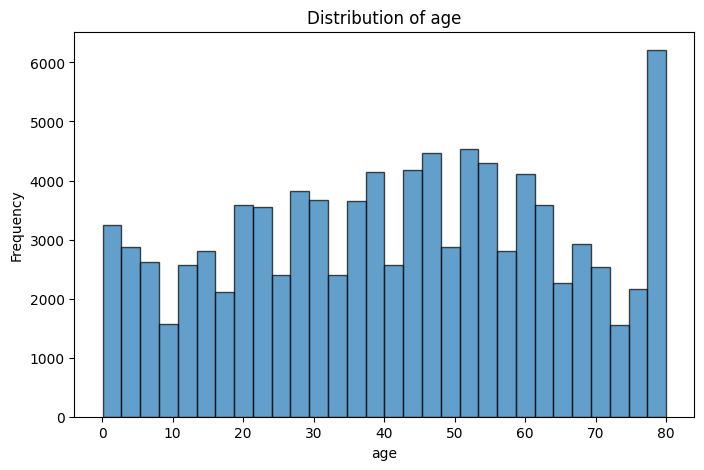

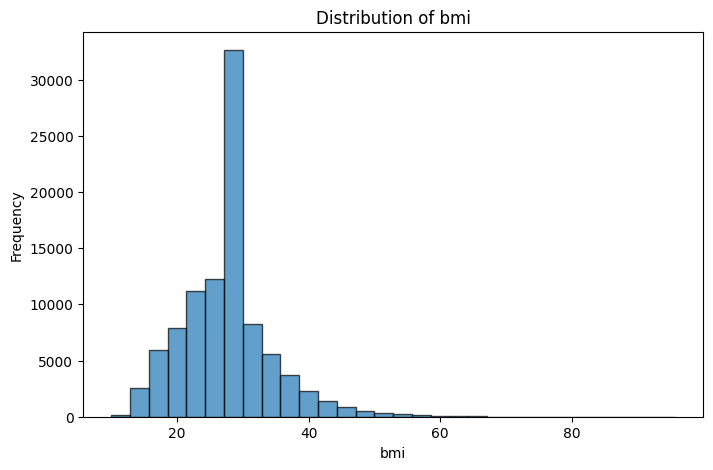

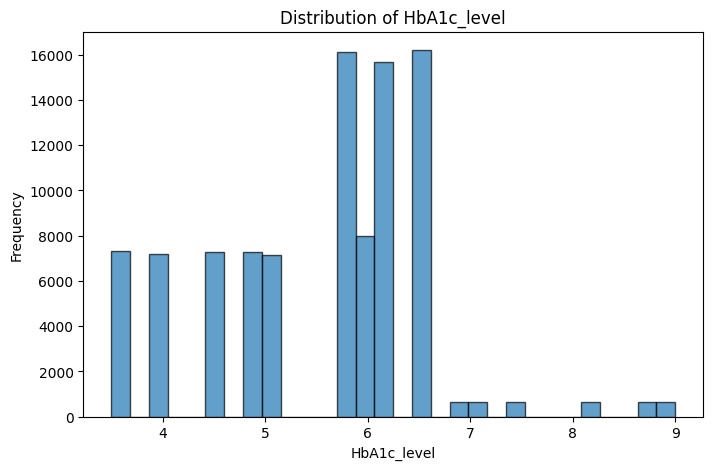

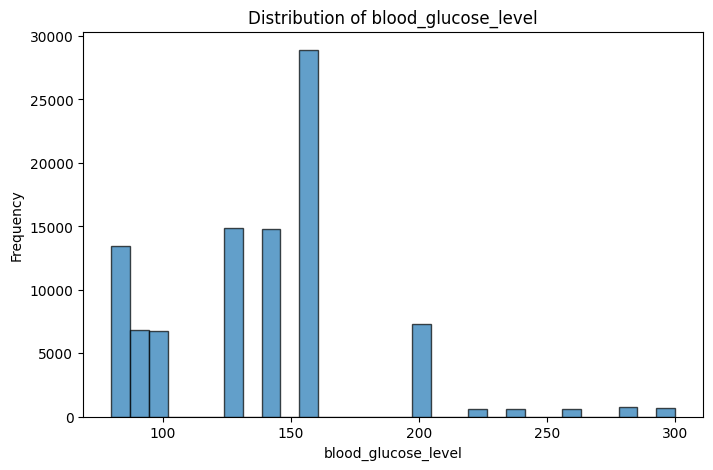

In [23]:
numeric_columns = ['age', 'bmi', 'HbA1c_level', 'blood_glucose_level']

for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(df[col], bins=30, edgecolor='k', alpha=0.7)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

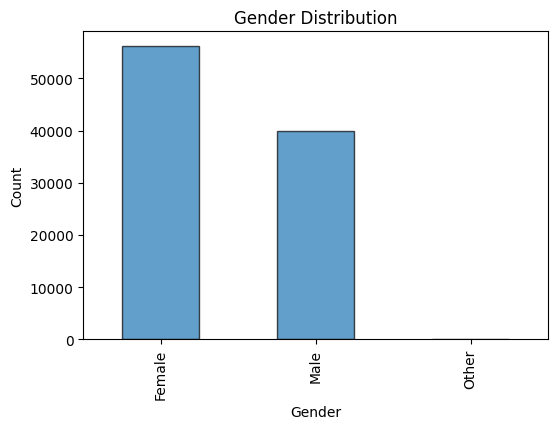

In [24]:
# Bar plot for gender
plt.figure(figsize=(6, 4))
df['gender'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

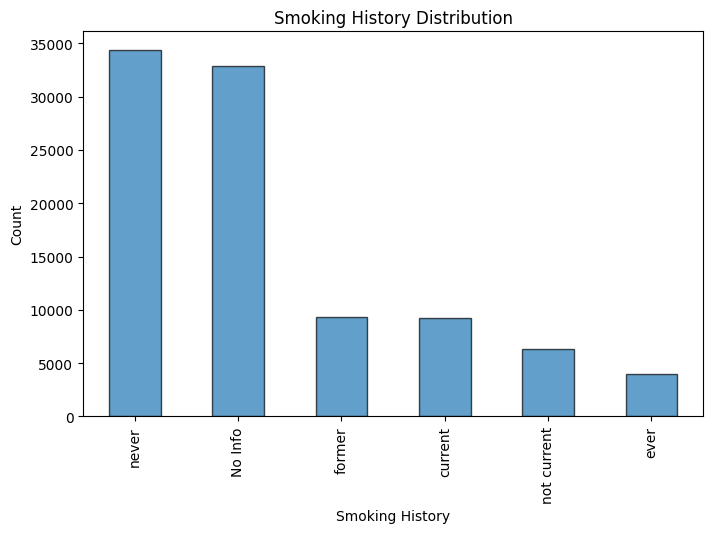

In [25]:
# Bar plot for smoking history
plt.figure(figsize=(8, 5))
df['smoking_history'].value_counts().plot(kind='bar', edgecolor='k', alpha=0.7)
plt.title('Smoking History Distribution')
plt.xlabel('Smoking History')
plt.ylabel('Count')
plt.show()

##### Step 3 - Finding Correlation between columns

In [26]:
categorical_columns = df.select_dtypes(include =['object']).columns
print(categorical_columns)
print("-"*50)
continous_columns = df.select_dtypes(include = ['number']).columns
print(continous_columns)

Index(['gender', 'smoking_history'], dtype='object')
--------------------------------------------------
Index(['age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level', 'blood_glucose_level', 'diabetes'], dtype='object')


<Axes: >

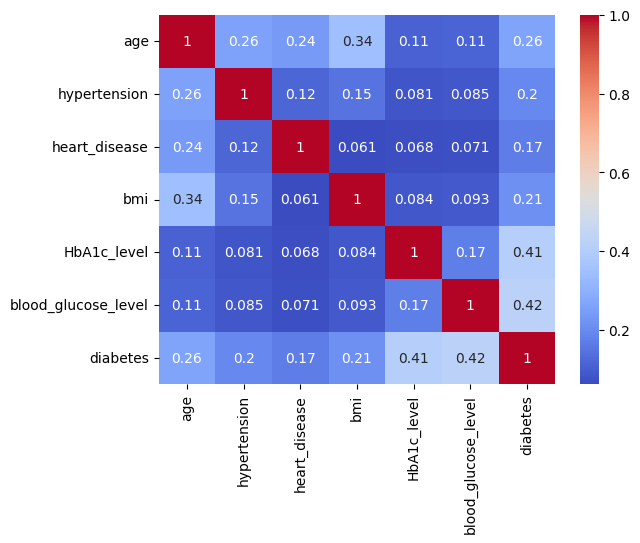

In [27]:
df_con = df[continous_columns].corr()
sns.heatmap(df_con, annot = True , cmap ='coolwarm')

In [28]:
# Age:Likely shows some relationship with diabetes, as age is a common risk factor, though the exact correlation needs confirmation from a more detailed analysis.
# BMI:May exhibit a positive correlation with diabetes, as higher BMI is a known risk factor for developing the condition.
# HbA1c Level:Expected to have a strong positive correlation with diabetes, as elevated HbA1c levels are directly linked to poor glucose regulation.
# Blood Glucose Level:Likely shows a strong positive correlation with diabetes, as elevated glucose levels are a key indicator of the condition.

##### Step 4 -- Finding outliers

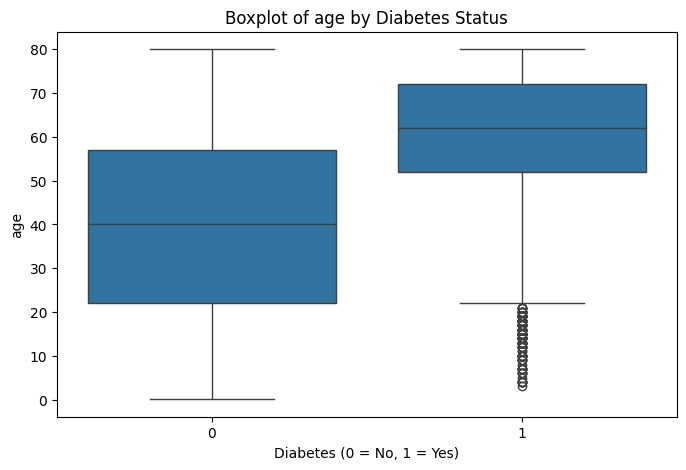

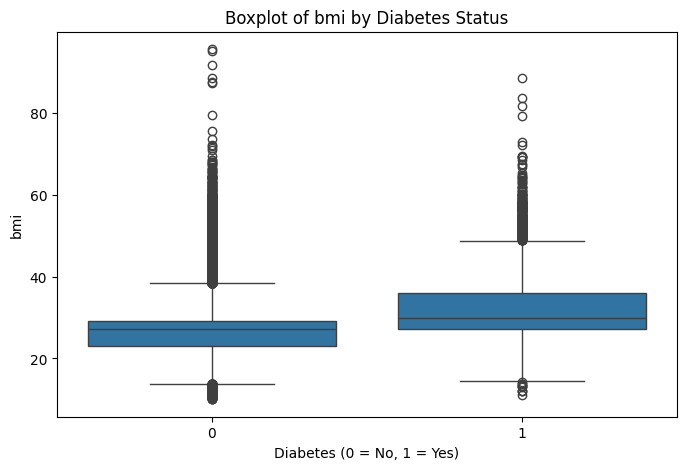

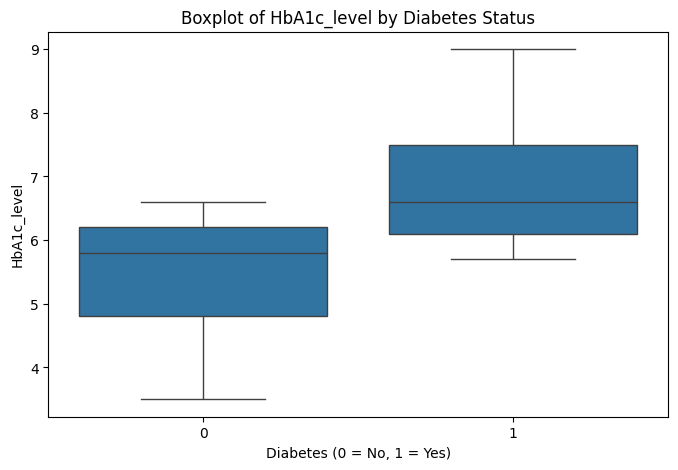

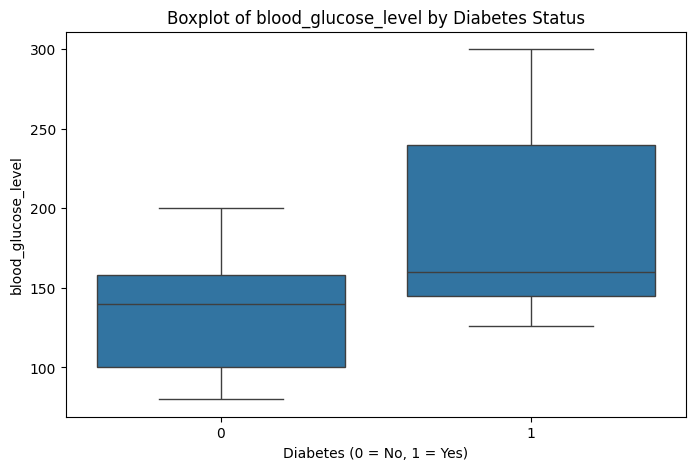

In [29]:
# Boxplot for age, bmi, HbA1c_level, blood_glucose_level by diabetes status
for col in ['age','bmi','HbA1c_level', 'blood_glucose_level']:
    plt.figure(figsize=(8, 5))
    sns.boxplot(data=df, x='diabetes', y=col)
    plt.title(f'Boxplot of {col} by Diabetes Status')
    plt.xlabel('Diabetes (0 = No, 1 = Yes)')
    plt.ylabel(col)
    plt.show()

In [30]:
encoder = LabelEncoder() 

for i in df.select_dtypes(include = 'object').columns:
    df[i] = encoder.fit_transform(df[i])

In [31]:
df.head(5)

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0


In [32]:
df['smoking_history'].unique()

array([4, 0, 1, 3, 2, 5])

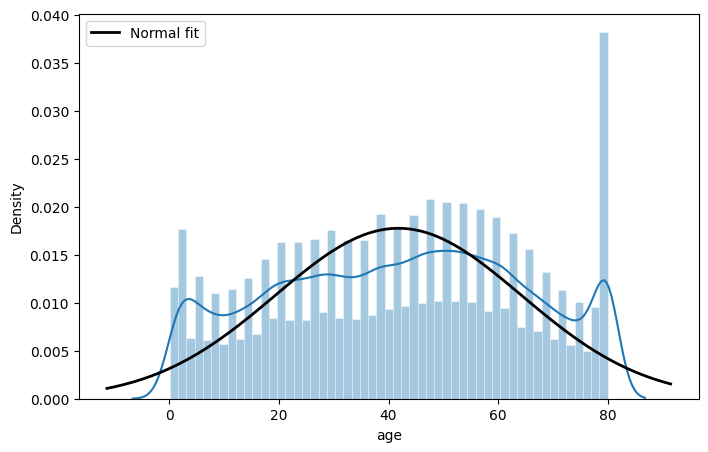

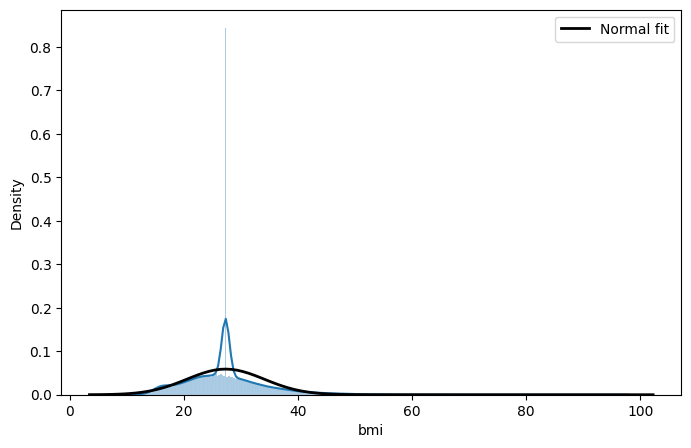

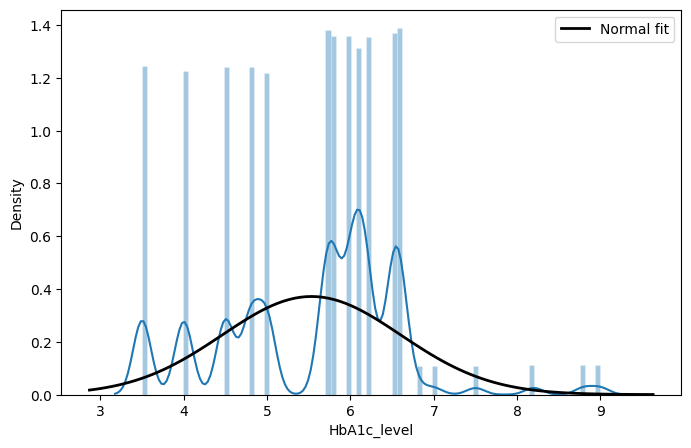

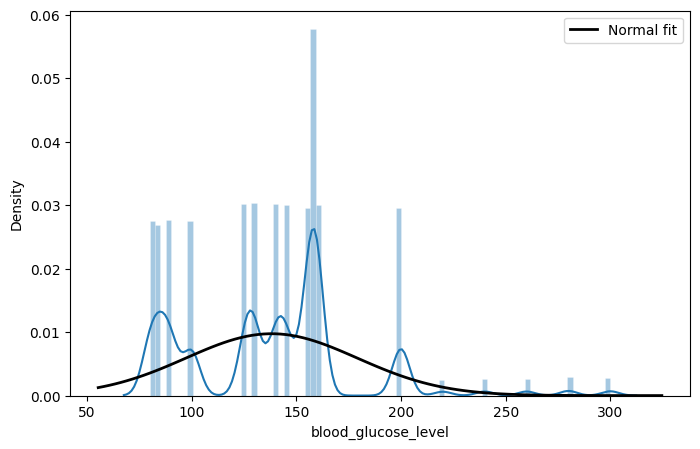

In [33]:
for col in ['age','bmi','HbA1c_level', 'blood_glucose_level']:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[col], kde=True, stat="density",  kde_kws=dict(cut=3), alpha=0.4,edgecolor = (1,1,1,.4))

    # Fit and overlay a normal distribution curve
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, np.mean(df[col]), np.std(df[col]))
    plt.plot(x, p, 'k', linewidth=2, label='Normal fit')

    plt.legend()
    plt.show() 

In [34]:
#Steps to identify skewness.
# case 1: output inbetween (-0.5 to 0.5) Less skewness. Can be neglected.
# case 2: output inbetween (-1 to -0.5 or 0.5 to 1) moderately skewness. Can be considered for transmission.
# case 3: output inbetween (less than -1 or greater than 1) highly skewness. advisable to be considered for transmission.
#if the data is high for case 3,then transformation is highly recommended. If data is low, it is not recommended.


#Steps to identify kurtosis.
# case 1: output inbetween (-3 to 3) Less kurtosis. Can be neglected.
# case 2: output inbetween (-6 to -3 or 3 to 6) moderately kurtosis. Can be considered for transmission.
# case 3: output inbetween (less than -6 or greater than 6) highly kurtosis. advisable to be considered for transmission.
#if the data is high for case 3,then transformation is highly recommended. If data is low, it is not recommended.

In [35]:
for col in ['age','bmi','HbA1c_level', 'blood_glucose_level']:
    print(col)
    skew_val = df[col].skew()
    kurtosis_val = df[col].kurtosis()
    print("skew: ", skew_val, "Kurtosis: " , kurtosis_val)
    print("--------------------------------------------")

age
skew:  -0.062444736060842554 Kurtosis:  -1.004415677016537
--------------------------------------------
bmi
skew:  1.0237511657232292 Kurtosis:  3.271554032432832
--------------------------------------------
HbA1c_level
skew:  -0.054463243946481645 Kurtosis:  0.23900685117797815
--------------------------------------------
blood_glucose_level
skew:  0.83648926055032 Kurtosis:  1.7584763418256188
--------------------------------------------


In [36]:
# Age:
# Skew: -0.06 (Case 1: Less skewness)
# The skewness is negligible, and no transformation is needed.
# Kurtosis: -1.00 (Case 1: Less kurtosis)
# The kurtosis is also low, so no transformation is required.

# BMI:
# Skew: 1.02 (Case 3: Highly skewed)
# The distribution is highly skewed, and transformation is highly recommended.
# Kurtosis: 3.27 (Case 2: Moderate kurtosis)
# The distribution has heavy tails, so transformation could further help normalize it.

# HbA1c Level:
# Skew: -0.05 (Case 1: Less skewness)
# The skewness is negligible, and no transformation is required.
# Kurtosis: 0.24 (Case 1: Less kurtosis)
# The kurtosis is low, confirming that the distribution is close to normal.

# Blood Glucose Level:
# Skew: 0.84 (Case 2: Moderate skewness)
# The distribution is moderately skewed, and transformation could be considered but is not mandatory.
# Kurtosis: 1.76 (Case 1: Less kurtosis)
# The kurtosis is low, so transformation may not be necessary unless skewness significantly impacts analysis.

In [37]:
df.head(10) 

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,4,25.19,6.6,140,0
1,0,54.0,0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,4,27.32,5.7,158,0
3,0,36.0,0,0,1,23.45,5.0,155,0
4,1,76.0,1,1,1,20.14,4.8,155,0
5,0,20.0,0,0,4,27.32,6.6,85,0
6,0,44.0,0,0,4,19.31,6.5,200,1
7,0,79.0,0,0,0,23.86,5.7,85,0
8,1,42.0,0,0,4,33.64,4.8,145,0
9,0,32.0,0,0,4,27.32,5.0,100,0


In [38]:
#Writing the Diabetes Preprocessed data to local file
df.to_csv('Preprocessed_data.csv',index = False)